In [1]:
import math
import numpy as np
import random as rnd


class SearchAlgorithms:
    def stochasticHillClimbing(problem, stuckIterations=10):
        current = problem.initialState()
        oldNeighbor = current.copy()
        stuck = 0
        while True:
            # Obtain best neighbor state from current one
            neighbor = problem.bestNeighbor(current)
            # print(neighbor, current, '|', problem.stateValue(neighbor), problem.stateValue(current))

            # Check if it's stuck in an infinite loop
            if np.array_equal(neighbor, oldNeighbor):
                stuck += 1
            else:
                stuck = 0

            # Return state if it's stuck in a maximum (local or global) or in a loop
            if problem.stateValue(neighbor) < problem.stateValue(current) or stuck > stuckIterations:
                # problem.printState(current)
                return current

            oldNeighbor = current.copy()
            current = neighbor.copy()

    def hillClimbingWithRandomRestart(problem, iterations=25):
        bestSolution = SearchAlgorithms.stochasticHillClimbing(problem)
        bestValue = problem.stateValue(bestSolution)
        for i in range(iterations):
            # Obtain solution from stochastic hill climbing
            solution = SearchAlgorithms.stochasticHillClimbing(problem)

            # If solution is better than the best one
            solutionValue = problem.stateValue(solution)
            if solutionValue > bestValue:
                bestSolution = solution.copy()
                bestValue = solutionValue

        # Return best solution state after iterations
        problem.printState(bestSolution, 'Hill climbing')
        return bestSolution

    def simulatedAnnealing(problem, schedule):
        current = problem.initialState()
        t = 0
        while True:
            t += 1
            T = schedule(t)

            if T <= 0:
                problem.printState(current, 'Simulated annealing')
                return current

            neighbor = problem.randomNeighbor(current)
            deltaE = problem.stateValue(neighbor) - problem.stateValue(current)

            # print(deltaE, math.exp(deltaE/T), T)
            if deltaE > 0 or rnd.random() <= math.exp(deltaE/T):
                current = neighbor.copy()

    def schedule(time):
        T0 = 100
        alpha = 0.99
        return T0 * alpha ** time


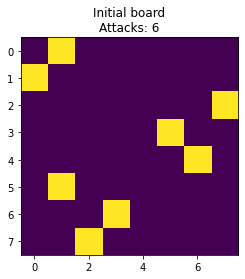

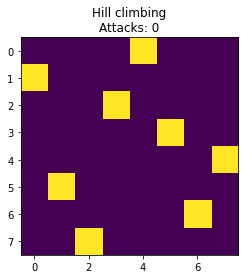

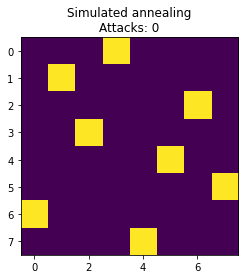

array([4, 2, 7, 3, 6, 8, 1, 5])

In [2]:
from NQueens import NQueens
nq = NQueens(8)
SearchAlgorithms.hillClimbingWithRandomRestart(nq)
SearchAlgorithms.simulatedAnnealing(nq, SearchAlgorithms.schedule)


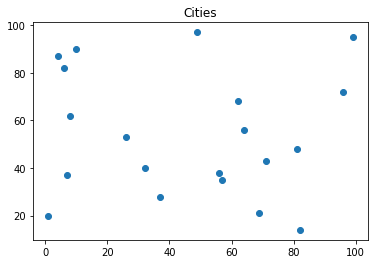

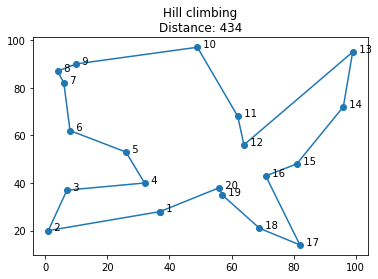

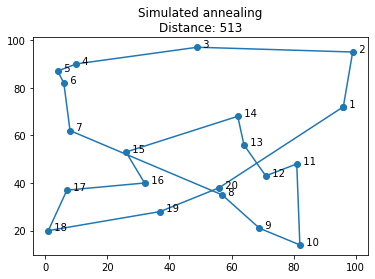

array([[96, 72],
       [99, 95],
       [49, 97],
       [10, 90],
       [ 4, 87],
       [ 6, 82],
       [ 8, 62],
       [57, 35],
       [69, 21],
       [82, 14],
       [81, 48],
       [71, 43],
       [64, 56],
       [62, 68],
       [26, 53],
       [32, 40],
       [ 7, 37],
       [ 1, 20],
       [37, 28],
       [56, 38]])

In [4]:
from TravellingSalesman import TravellingSalesman
ts = TravellingSalesman(20)
SearchAlgorithms.hillClimbingWithRandomRestart(ts)
SearchAlgorithms.simulatedAnnealing(ts, SearchAlgorithms.schedule)
